<a href="https://colab.research.google.com/github/nallishiva/Admissions-process-analysis/blob/main/Admission-process-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment on Admissions process analysis by Tetr**

---



**Assignment Objectives**
1. Data Preparation


*   Clean and preprocess the provided datasets.
*  Establish relationships between datasets using the ApplicationID field.





# Step 1: Load Datasets

In [3]:
import pandas as pd

In [4]:
aptitude_data=pd.read_csv('/content/Assignment _ Admissions Process Analysis - Aptitude_Data.csv')

In [5]:
communication_data=pd.read_csv('/content/Assignment _ Admissions Process Analysis - Communication_Data.csv')

In [6]:
demographics_application_data=pd.read_csv('/content/Assignment _ Admissions Process Analysis - Demographics_Applications.csv')

In [7]:
interview_data=pd.read_csv('/content/Assignment _ Admissions Process Analysis - Interview_Data.csv')

Now we have uploaded all the data that we need. Let's dive in to the 1st objective  

*   Clean and preprocess the provided datasets.




# step 2 clean and preprocess each data set



cleaning aptitude_scores

In [8]:
print("cleaning test scores..")
print(aptitude_data.head())
print(aptitude_data.info())


cleaning test scores..
  ApplicationID    TestDate  QuantitativeScore  LogicalScore  VerbalScore  \
0        A00001  2024-12-03                 30            15           27   
1        A00002  2024-03-22                 14            13           38   
2        A00003  2023-12-18                 12            18           28   
3        A00004  2024-11-13                 24            34           35   
4        A00005  2024-07-17                 28            10           16   

   TotalScore  
0          72  
1          65  
2          58  
3          93  
4          54  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ApplicationID      5000 non-null   object
 1   TestDate           5000 non-null   object
 2   QuantitativeScore  5000 non-null   int64 
 3   LogicalScore       5000 non-null   int64 
 4   VerbalScore        5000 n

In [9]:
#Lets check for the missing values

In [10]:
if aptitude_data.isnull().sum().sum()>0:
  print("Missing values found")
else :
    print("No missing values found")

No missing values found


In [11]:
#Lets verify TotalScore consistency

In [12]:
aptitude_data['CalculatedTotal'] = aptitude_data['QuantitativeScore'] + aptitude_data['LogicalScore'] + aptitude_data['VerbalScore']
inconsistent_scores = aptitude_data[aptitude_data['TotalScore'] != aptitude_data['CalculatedTotal']]
if not inconsistent_scores.empty:
    print("Inconsistent TotalScores found:", inconsistent_scores)
    aptitude_data['TotalScore'] = aptitude_data['CalculatedTotal']  # Correct them
aptitude_data.drop(columns=['CalculatedTotal'], inplace=True)

In [13]:
# we can see thagt there is no totalscore mismatch

In [14]:
#lets convert the TestDate to datatime

In [15]:
aptitude_data['TestDate'] = pd.to_datetime(aptitude_data['TestDate'])

cleaning communication dataset


In [16]:
print("\nCleaning Communication...")
print(communication_data.head())
print(communication_data.info())


Cleaning Communication...
  ApplicationID   Channel        Date         MessageType  \
0        A00001     Email  2024-03-17           Thank You   
1        A00002  WhatsApp  2024-01-20  Application Status   
2        A00003     Email  2024-05-29           Follow-Up   
3        A00004     Email  2024-11-21           Follow-Up   
4        A00005     Email  2024-07-11           Thank You   

   ResponseTime (hours)  
0                   4.0  
1                  48.0  
2                   NaN  
3                   2.0  
4                   NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ApplicationID         5000 non-null   object 
 1   Channel               5000 non-null   object 
 2   Date                  5000 non-null   object 
 3   MessageType           5000 non-null   object 
 4   ResponseTime (hours)  4317 non-nu

In [17]:
#Lets check for the missing values

In [18]:
if communication_data.isnull().sum().sum()>0:
  print("Missing values found")
else :
    print("No missing values found")

Missing values found


In [19]:
if communication_data.isnull().sum().sum() > 0:
    print("Missing values found in Communication:", communication_data.isnull().sum())
    communication_data.dropna(inplace=True)

Missing values found in Communication: ApplicationID             0
Channel                   0
Date                      0
MessageType               0
ResponseTime (hours)    683
dtype: int64


In [20]:
#we can see that there is no missing values found.

In [21]:
# Lets Convert Date to datetime

In [22]:
communication_data['Date'] = pd.to_datetime(communication_data['Date'])

In [23]:
# Check for duplicates (multiple communications per applicant are okay, but exact duplicates aren't)

In [24]:
communication_data.drop_duplicates(inplace=True)

Lets clean the applications data set

In [25]:
print("\nCleaning Applicants...")
print(demographics_application_data.head())
print(demographics_application_data.info())


Cleaning Applicants...
  ApplicationID               Name  Gender  Age            City         State  \
0        A00001     Jennifer Jones   Other   31       Kinghaven      Nebraska   
1        A00002  Samantha Marshall  Female   19      Jamieville       Indiana   
2        A00003        Troy Fisher    Male   29  Franciscohaven   Mississippi   
3        A00004      Nicholas Neal  Female   23     Josephshire     Minnesota   
4        A00005        Linda Wells    Male   26  Port Aimeeview  Rhode Island   

  AppliedProgram    ApplicationStatus DateApplied  
0       Business             Accepted  2024-10-17  
1            Law             Rejected  2024-02-20  
2       Business             Rejected  2024-01-13  
3            Law  Interview Scheduled  2024-02-07  
4       Business  Interview Scheduled  2024-05-08  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             

In [26]:
#Lets check for the missing values

In [27]:
if demographics_application_data.isnull().sum().sum() > 0:
    print("Missing values found in Applicants:", demographics_application_data.isnull().sum())
    demographics_application_data.dropna(inplace=True)

In [28]:
# Lets Convert Date to datetime

In [29]:
demographics_application_data['DateApplied'] = pd.to_datetime(demographics_application_data['DateApplied'])

In [30]:
#Lets Check for duplicate ApplicationIDs (should be unique)

In [31]:
duplicates = demographics_application_data.duplicated(subset=['ApplicationID']).sum()
if duplicates > 0:
    print(f"Found {duplicates} duplicate ApplicationIDs in Applicants")
    demographics_application_data.drop_duplicates(subset=['ApplicationID'], inplace=True)

  Lets clean the interview data set
  

In [32]:
print("\nCleaning Interviews...")
print(interview_data.head())
print(interview_data.info())


Cleaning Interviews...
  ApplicationID    InterviewerName InterviewDate  Score  \
0        A00001     Thomas Johnson    2024-08-17     73   
1        A00002        John Greene    2024-04-12     64   
2        A00003     Heather Crosby    2024-09-12     56   
3        A00004  Christina Johnson    2024-08-24     57   
4        A00005         Sean Meyer    2024-10-23     53   

                  Feedback  
0      Average performance  
1  Excellent communication  
2        Needs improvement  
3      Average performance  
4        Needs improvement  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ApplicationID    5000 non-null   object
 1   InterviewerName  5000 non-null   object
 2   InterviewDate    5000 non-null   object
 3   Score            5000 non-null   int64 
 4   Feedback         5000 non-null   object
dtypes: int64(1), object(4

In [33]:
#Lets check for the missing values

In [34]:
if interview_data.isnull().sum().sum() > 0:
    print("Missing values found in Interviews:", interview_data.isnull().sum())
    interview_data.dropna(inplace=True)

In [35]:
# Lets Convert Date to datetime

In [36]:
interview_data['InterviewDate'] = pd.to_datetime(interview_data['InterviewDate'])

In [37]:
# Validate InterviewDate vs DateApplied (after merging)
# Check score range (50-100)

In [38]:
invalid_scores = interview_data[(interview_data['Score'] < 50) | (interview_data['Score'] > 100)]
if not invalid_scores.empty:
    print("Invalid interview scores found:", invalid_scores)
    interview_data = interview_data[(interview_data['Score'] >= 50) & (interview_data['Score'] <= 100)]

In [39]:
aptitude_data['TotalScore'] = aptitude_data[['VerbalScore', 'QuantitativeScore', 'LogicalScore']].sum(axis=1, skipna=True)
communication_data['ResponseTime (hours)'] = communication_data['ResponseTime (hours)'].fillna(-1)  # -1 for no response
demographics_application_data['ApplicationStatus'] = demographics_application_data['ApplicationStatus'].fillna('Under Review')

In [40]:
# Step 3: Aggregate communication data to one row per ApplicationID
# Example: Count messages by type and average response time
communication_agg = communication_data.groupby('ApplicationID').agg(
    NumThankYou=('MessageType', lambda x: (x == 'Thank You').sum()),
    NumFollowUp=('MessageType', lambda x: (x == 'Follow-Up').sum()),
    NumReminder=('MessageType', lambda x: (x == 'Reminder').sum()),
    NumAppStatus=('MessageType', lambda x: (x == 'Application Status').sum()),
    AvgResponseTime=('ResponseTime (hours)', 'mean'),
    LastCommDate=('Date', 'max'),
    MostFrequentChannel=('Channel', lambda x: x.mode()[0])# Keep the most recent communication date
).reset_index()

In [41]:
# Step 4: Merge datasets on ApplicationID
# Start with applications_df as the base
merged_df = demographics_application_data.merge(aptitude_data, on='ApplicationID', how='inner', suffixes=('', '_aptitude'))

# Merge with aggregated communication data
merged_df = merged_df.merge(communication_agg, on='ApplicationID', how='inner', suffixes=('', '_comm'))

# Merge with interview data
merged_df = merged_df.merge(interview_data, on='ApplicationID', how='inner', suffixes=('', '_interview'))

# Step 5: Validate the merged dataset
print(f"Number of rows in merged dataset: {merged_df.shape[0]}")
print(f"Number of columns in merged dataset: {merged_df.shape[1]}")
print("\nSample of merged dataset:")
print(merged_df.head())

# Step 6: Save the merged dataset (optional)
merged_df.to_excel('merged_admissions_data.xlsx', index=False)
print("Merged dataset saved as 'merged_admissions_data.xlsx'")

Number of rows in merged dataset: 4317
Number of columns in merged dataset: 25

Sample of merged dataset:
  ApplicationID               Name  Gender  Age          City       State  \
0        A00001     Jennifer Jones   Other   31     Kinghaven    Nebraska   
1        A00002  Samantha Marshall  Female   19    Jamieville     Indiana   
2        A00004      Nicholas Neal  Female   23   Josephshire   Minnesota   
3        A00006    Nathan Guerrero  Female   22  Paynechester  Washington   
4        A00007    Melissa Mcgrath   Other   26   New Cynthia      Alaska   

  AppliedProgram    ApplicationStatus DateApplied   TestDate  ...  \
0       Business             Accepted  2024-10-17 2024-12-03  ...   
1            Law             Rejected  2024-02-20 2024-03-22  ...   
2            Law  Interview Scheduled  2024-02-07 2024-11-13  ...   
3       Business             Accepted  2024-04-01 2024-09-18  ...   
4       Business  Interview Scheduled  2024-11-12 2024-12-02  ...   

   NumFollowUp  

We have cleaned and preprocessed the data sets

#Step 3: Establish Relationships

#Step 4: Save Cleaned Datasets



we have Saved the merged master_df and linked communication_linked as CSVs for further analysis.

#Objective 2: Data Analysis and Insights



*   Analyze the admissions funnel (applications → interviews → enrollment).
*   Identify demographic trends (e.g., top-performing cities, age group analysis).


*   Evaluate applicant performance in interviews and aptitude tests.
*   Assess the impact of communication channels and response times on conversion rates.






In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Load the merged dataset
df = pd.read_excel('merged_admissions_data.xlsx')

In [44]:
# Ensure proper data types
df['DateApplied'] = pd.to_datetime(df['DateApplied'])
df['TestDate'] = pd.to_datetime(df['TestDate'])
df['LastCommDate'] = pd.to_datetime(df['LastCommDate'])
df['InterviewDate'] = pd.to_datetime(df['InterviewDate'])

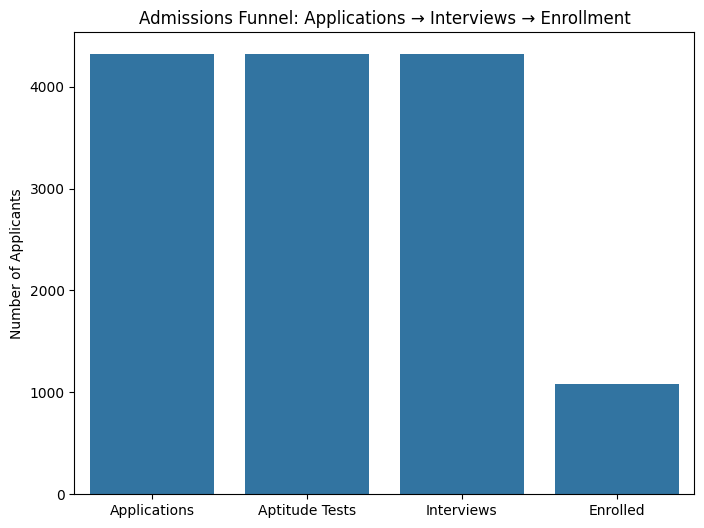

In [45]:
# --- 2.1: Analyze the Admissions Funnel ---
# Define funnel stages based on available data
funnel_stages = {
    'Applications': df['ApplicationID'].nunique(),
    'Aptitude Tests': df['TestDate'].notna().sum(),
    'Interviews': df['InterviewDate'].notna().sum(),
    'Enrolled': df[df['ApplicationStatus'] == 'Accepted']['ApplicationID'].nunique()
}

# Plot funnel
plt.figure(figsize=(8, 6))
sns.barplot(x=list(funnel_stages.keys()), y=list(funnel_stages.values()))
plt.title('Admissions Funnel: Applications → Interviews → Enrollment')
plt.ylabel('Number of Applicants')
plt.show()

Top 5 Cities by Enrollment:
 City
North John      3
West Mary       3
New Michael     3
Port Michael    3
Matthewside     2
Name: count, dtype: int64


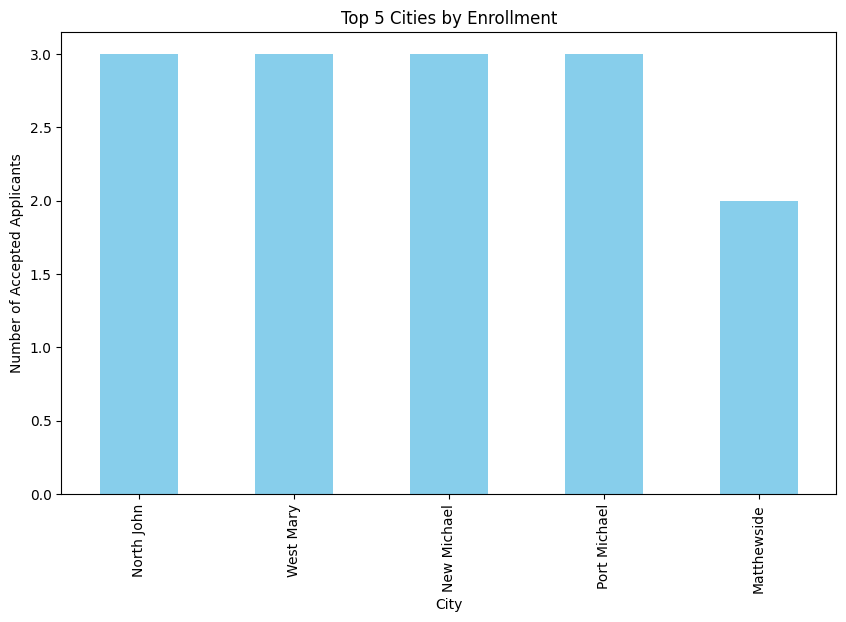

In [46]:
# --- 2.2: Identify Demographic Trends ---
# Assuming 'City' and 'Age' are in applications_data (if not, adjust accordingly)
if 'City' in df.columns and 'Age' in df.columns:
    # Top-performing cities by enrollment
    top_cities = df[df['ApplicationStatus'] == 'Accepted']['City'].value_counts().head(5)
    print("Top 5 Cities by Enrollment:\n", top_cities)

    # Plot top cities
    plt.figure(figsize=(10, 6))
    top_cities.plot(kind='bar', color='skyblue')
    plt.title('Top 5 Cities by Enrollment')
    plt.xlabel('City')
    plt.ylabel('Number of Accepted Applicants')
    plt.show()

Enrollment by Age Group:
 AgeGroup
26-35    565
18-25    453
<18       67
36-45      0
45+        0
Name: count, dtype: int64


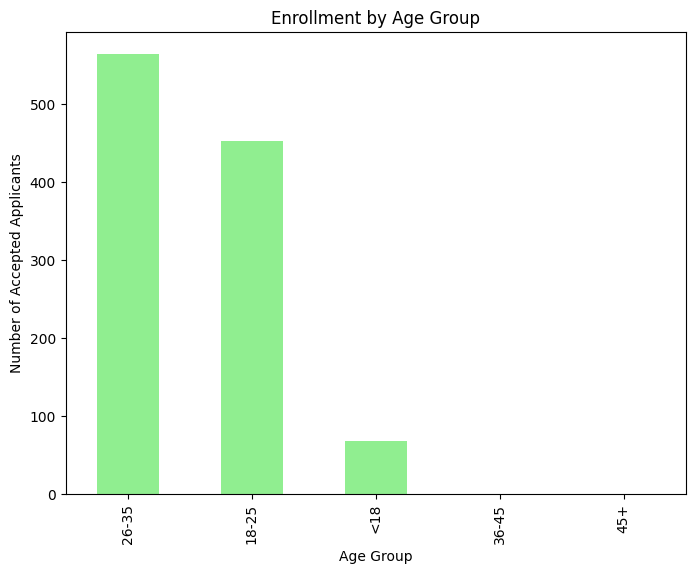

In [47]:
# Age group analysis - Corrected indentation
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 25, 35, 45, 100],
                        labels=['<18', '18-25', '26-35', '36-45', '45+'])
age_enrollment = df[df['ApplicationStatus'] == 'Accepted']['AgeGroup'].value_counts()
print("Enrollment by Age Group:\n", age_enrollment)

# Plot age groups
plt.figure(figsize=(8, 6))
age_enrollment.plot(kind='bar', color='lightgreen')
plt.title('Enrollment by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Accepted Applicants')
plt.show()

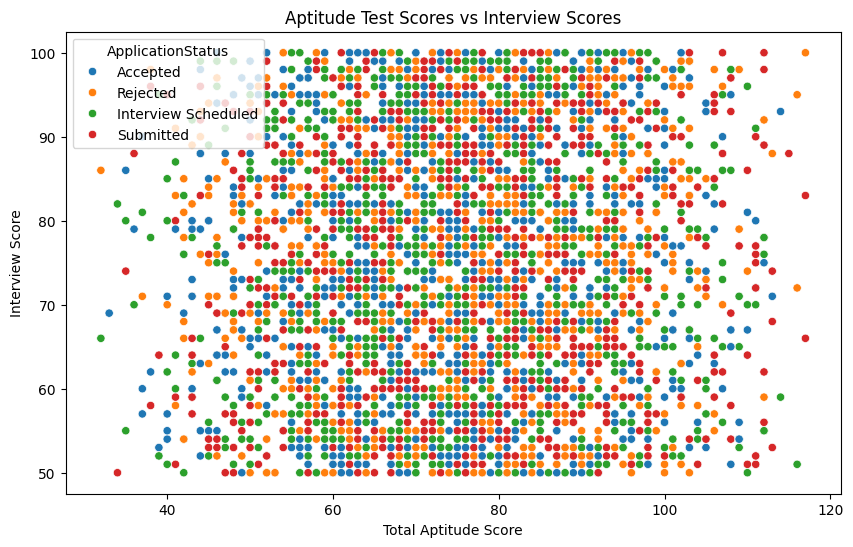

Average Scores by Application Status:
                      TotalScore      Score
ApplicationStatus                         
Accepted              74.367742  75.085714
Interview Scheduled   74.843190  74.538530
Rejected              75.104390  75.925854
Submitted             75.437214  74.780935


In [48]:
# --- 2.3: Evaluate Applicant Performance ---
# Interview vs Aptitude Test Scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalScore', y='Score', hue='ApplicationStatus', data=df)
plt.title('Aptitude Test Scores vs Interview Scores')
plt.xlabel('Total Aptitude Score')
plt.ylabel('Interview Score')
plt.show()

# Average scores by status
avg_scores = df.groupby('ApplicationStatus')[['TotalScore', 'Score']].mean()
print("Average Scores by Application Status:\n", avg_scores)

Communication Channel Impact:
                      TotalApplicants  Accepted  ConversionRate
MostFrequentChannel                                           
Email                           1398       349       24.964235
Phone Call                      1483       390       26.298045
WhatsApp                        1436       346       24.094708


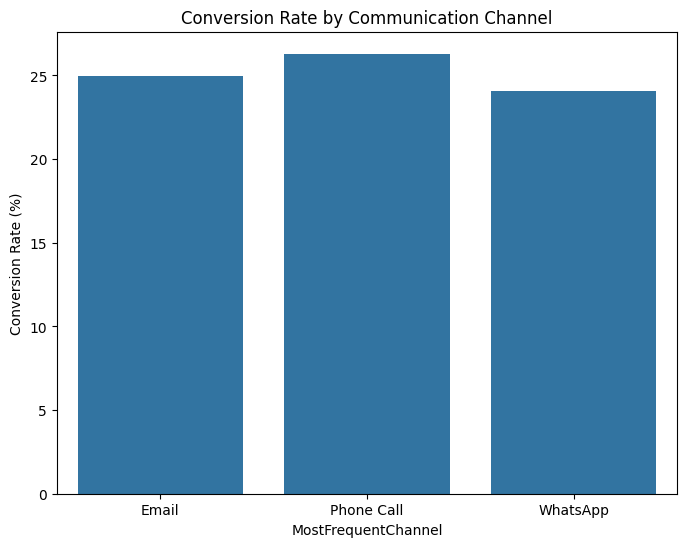

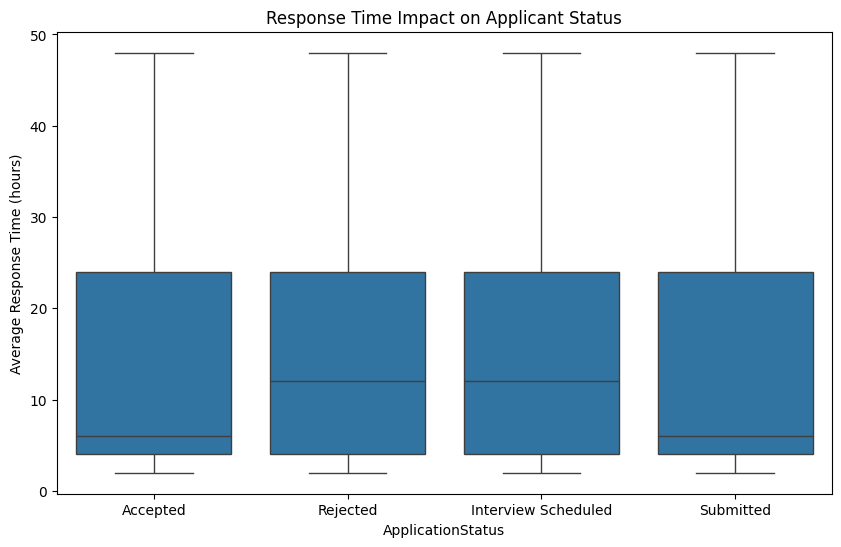


Analysis complete!


In [49]:
# --- 2.4: Assess Impact of Communication on Conversion Rates ---
# Analyze by Channel
comm_impact = df.groupby('MostFrequentChannel').agg(
    TotalApplicants=('ApplicationID', 'count'),
    Accepted=('ApplicationStatus', lambda x: (x == 'Accepted').sum())
)
comm_impact['ConversionRate'] = comm_impact['Accepted'] / comm_impact['TotalApplicants'] * 100
print("Communication Channel Impact:\n", comm_impact)

# Plot conversion rates
plt.figure(figsize=(8, 6))
sns.barplot(x=comm_impact.index, y=comm_impact['ConversionRate'])
plt.title('Conversion Rate by Communication Channel')
plt.ylabel('Conversion Rate (%)')
plt.show()

# Response Time Impact (unchanged)
plt.figure(figsize=(10, 6))
sns.boxplot(x='ApplicationStatus', y='AvgResponseTime', data=df)
plt.title('Response Time Impact on Applicant Status')
plt.ylabel('Average Response Time (hours)')
plt.show()

print("\nAnalysis complete!")